In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/updatedresumedataset/UpdatedResumeDataSet.csv


In [2]:
df = pd.read_csv("/kaggle/input/updatedresumedataset/UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# EDA - Exploratory Data Analysis

In [4]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Distribution of Resume Categories

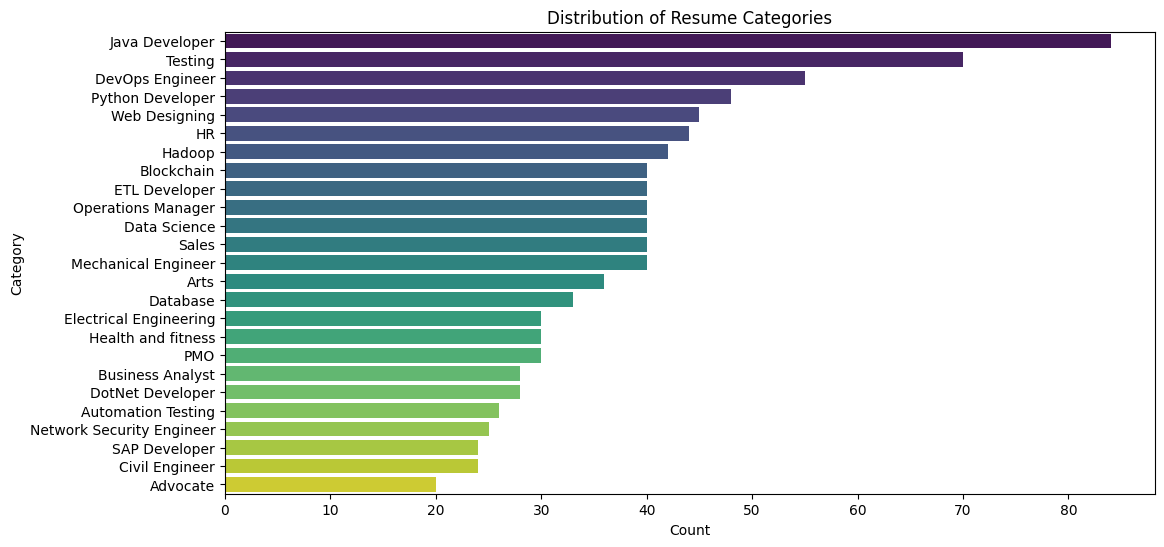

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="viridis")
plt.title("Distribution of Resume Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

## Resume Length Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


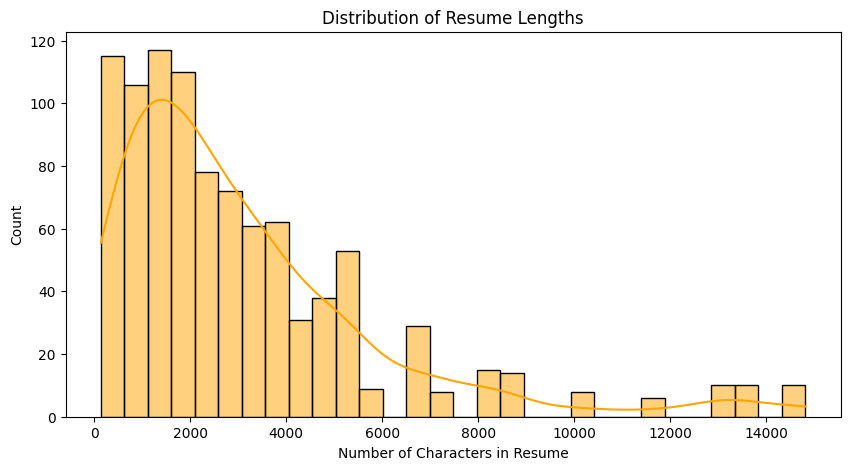

In [7]:
df['Resume_Length'] = df['Resume'].apply(lambda x: len(x))

plt.figure(figsize=(10, 5))
sns.histplot(df['Resume_Length'], bins=30, kde=True, color='orange')
plt.title("Distribution of Resume Lengths")
plt.xlabel("Number of Characters in Resume")
plt.ylabel("Count")
plt.show()

## WordCloud of Most Common Words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


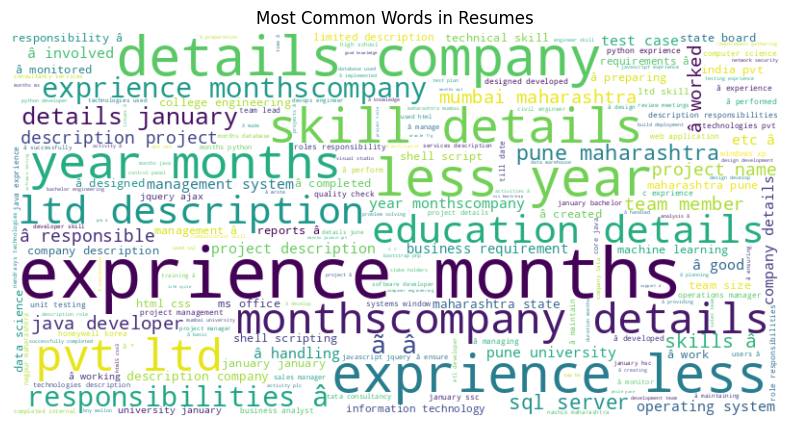

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Resume']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Resumes")
plt.show()

## Remarks
1. Distribution of Resume Categories:
   
The most frequent categories are:
+ Java Developer (84 resumes)
+ Testing (70 resumes)
+ DevOps Engineer (55 resumes)
+ Python Developer (48 resumes)
+ Web Designing (45 resumes)

This suggests a strong presence of profiles related to software development and emerging technologies.

2. Resume Length Analysis:

Average: 3,160 characters
+ Minimum: 142 characters (probably a very short or poorly formatted resume)
+ Maximum: 14,816 characters (a highly detailed resume)
+ Distribution: Most resumes are between 1,200 and 4,000 characters in length.

3. Most Frequent Words Analysis:
The most common words include "and", "the", "of", "to", "in", which are expected in English texts.
An interesting word to note is "exprience", which seems to be a common misspelling of "experience." This suggests that further text cleaning might be necessary.

4. Interpretation and Key Insights

+ Category Balance: Some categories have significantly more examples than others, which could create an imbalance when training a classification model.
+ Data Cleaning Needs: Spelling mistakes and special characters ("â\x80¢") indicate that additional text preprocessing is required.
+ Resume Length Variation: There is a wide range in resume lengths, and it may be interesting to examine whether certain categories tend to have longer or shorter resumes.

5. Next Steps:
+ Perform a deeper analysis of keywords specific to each category.
+ Improve text cleaning (removal of special characters, spelling corrections).
+ Build a classification model to categorize resumes based on their content.

# Data preparation

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
import re
import string

## Text Preprocessing

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text cleaning
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization and Padding

In [11]:
max_words = 20000  # Maximum number of words in the vocabulary
max_len = 300  # Maximum sequence length

# Tokenize text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Cleaned_Resume'])
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Cleaned_Resume'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

## Label Encoding

In [12]:
label_mapping = {label: idx for idx, label in enumerate(df['Category'].unique())}
df['Category_Label'] = df['Category'].map(label_mapping)
y = to_categorical(df['Category_Label'])  # Convert labels to one-hot encoding

## Train-Test Split

When separating data into training and test sets, we use the train_test_split function in sklearn.model_selection. Two important parameters in this function are stratify and random_state.

stratify: Ensuring a balanced distribution of classes
random_state: Ensure reproducibility of results

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)